In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix

In [2]:
#Importing warning filter 

from warnings import simplefilter 

#ignore all future warnings

simplefilter(action = "ignore", category = FutureWarning)

In [3]:
df = pd.read_csv("/Users/kule/Documents/Softwarica/Machine Learning/Assignment /CRdata/main_data.csv")

In [4]:
df.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating,Sector
0,51274.000,322.000,1855.0,22489.000,7833.000,14485.000,47489.000,-3443.000,0.438604,1.079703,...,2325.00,122.300,1094.000,5.75,40180.000,6524.000,-894.000,5630.000,BB-,Consumer Durables
1,16004.253,8.881,302.2,4021.785,1341.813,1341.813,11068.341,2211.725,0.251295,1.445949,...,442.96,6.339,282.587,3.97,3498.682,1023.390,198.081,1221.471,A-,Consumer Durables
2,52666.000,18620.000,1325.0,20681.000,4975.000,12743.000,31949.000,18302.000,0.392682,1.648440,...,775.00,75.000,2434.000,1.81,20853.000,3203.000,11147.000,14350.000,A+,Consumer Durables
3,2266.847,399.031,0.0,0.000,138.992,328.007,139.716,2045.973,0.000000,16.224677,...,184.51,1.670,118.541,2.40,630.936,96.458,-132.742,-36.284,BB+,Consumer Durables
4,69146.000,17996.000,1634.0,19027.000,5601.000,16799.000,51203.000,13165.000,0.275171,1.350429,...,2049.00,49.500,0.000,8.17,63155.000,3719.000,12134.000,15853.000,A-,Consumer Durables


In [5]:
#Display the dimensions

print(f"The credit rating has the dataset has {df.shape[0]} records, each with {df.shape[1]} attributes")

The credit rating has the dataset has 901 records, each with 30 attributes


In [6]:
#Display the structure 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Assets - Total                             901 non-null    float64
 1   Cash                                       901 non-null    float64
 2   Debt in Current Liabilities - Total        901 non-null    float64
 3   Long-Term Debt - Total                     901 non-null    float64
 4   Earnings Before Interest                   901 non-null    float64
 5   Gross Profit (Loss)                        901 non-null    float64
 6   Liabilities - Total                        901 non-null    float64
 7   Retained Earnings                          901 non-null    float64
 8   Total debt/total asset                     901 non-null    float64
 9   total asset/total libiilities              901 non-null    float64
 10  EBTI/total asset          

In [7]:
df.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating,Sector
0,51274.000,322.000,1855.0,22489.000,7833.000,14485.000,47489.000,-3443.000,0.438604,1.079703,...,2325.00,122.300,1094.000,5.75,40180.000,6524.000,-894.000,5630.000,BB-,Consumer Durables
1,16004.253,8.881,302.2,4021.785,1341.813,1341.813,11068.341,2211.725,0.251295,1.445949,...,442.96,6.339,282.587,3.97,3498.682,1023.390,198.081,1221.471,A-,Consumer Durables
2,52666.000,18620.000,1325.0,20681.000,4975.000,12743.000,31949.000,18302.000,0.392682,1.648440,...,775.00,75.000,2434.000,1.81,20853.000,3203.000,11147.000,14350.000,A+,Consumer Durables
3,2266.847,399.031,0.0,0.000,138.992,328.007,139.716,2045.973,0.000000,16.224677,...,184.51,1.670,118.541,2.40,630.936,96.458,-132.742,-36.284,BB+,Consumer Durables
4,69146.000,17996.000,1634.0,19027.000,5601.000,16799.000,51203.000,13165.000,0.275171,1.350429,...,2049.00,49.500,0.000,8.17,63155.000,3719.000,12134.000,15853.000,A-,Consumer Durables


In [8]:
#Analysing labels, as we are working with ordinal labels. We are going from more secure to less secure ratings. AAA is most secure nad D is the least secure. Hence, company will likely default on its creditors.

df.Rating.value_counts()

Rating
BBB     116
BB-     101
BBB+     91
BBB-     91
BB       87
BB+      82
B+       69
B        63
A-       52
A        47
B-       31
A+       18
CCC+     16
AA-      14
CCC       7
CC        5
AA+       3
AA        3
CCC-      3
AAA       2
Name: count, dtype: int64

In [9]:
#Replace with dictionary of each ratings 

rating_dict = {"AAA":"Lowest Risk",
              "AA+":"Lowest Risk",
              "AA":"Low Risk", 
              "A+": "Low Risk",
              "A-": "Low Risk",
              "A": "Low Risk",
              "BBB": "Medium Risk",
              "BBB+": "Medium Risk",
              "BBB-": "Medium Risk",
              "BB": "Medium High Risk",
              "BB+": "Medium High Risk",
              "BB-": "Medium High Risk",
              "B": "High Risk", 
              "B+": "High Risk",
              "B-": "High Risk",
              "CCC":"Highest Risk",
              "CCC+": "Highest Risk",
              "CCC-": "Highest Risk",
              "CC":"Highest Risk"}

df.Rating = df.Rating.map(rating_dict)

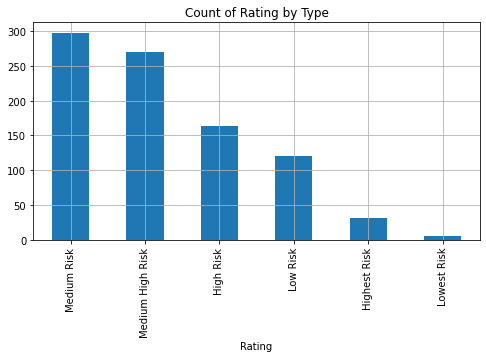

In [10]:
ax = df["Rating"].value_counts().plot(kind = "bar", figsize = (8, 4), title = "Count of Rating by Type", grid = True)

In [11]:
df.Rating.value_counts()

Rating
Medium Risk         298
Medium High Risk    270
High Risk           163
Low Risk            120
Highest Risk         31
Lowest Risk           5
Name: count, dtype: int64

In [12]:
#Drop rows having number of credit ratings "Lowest Risk" to remove data points with few data 

df = df[df["Rating"]!= "Lowest Risk"]
df.reset_index(inplace = True, drop = True)



## Descriptive Statistics

In [13]:
#Descriptive Statistics

df.describe()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Book Value Per Share,Common Equity - Liquidation Value,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow
count,8.960000e+02,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,2.808169e+04,1317.927161,2114.351836,5735.320735,1856.319994,3254.764705,2.207601e+04,3535.457367,0.361974,1.589266,...,20.698646,5601.692964,588.804006,24.056075,2235.262844,2.344866,9681.165802,1545.030529,-337.891140,1207.139390
std,1.093679e+05,5230.007313,16130.300343,13868.752637,3885.560529,7069.163836,9.837837e+04,12684.836802,0.227287,0.714751,...,42.859993,13571.303391,1886.027551,47.924164,17759.944728,5.849533,20183.676534,3779.536422,3965.744526,5264.811363
min,1.448600e+02,0.000000,0.000000,0.000000,-1068.879000,-943.843000,9.883300e+01,-74965.000000,0.000000,0.365850,...,-121.591200,-12688.000000,-6174.000000,0.000000,0.000000,-27.960000,47.584000,-2648.000000,-89131.000000,-89375.000000
25%,2.407768e+03,77.419500,4.888750,787.858000,236.540500,435.309250,1.594395e+03,-214.820750,0.218870,1.249399,...,6.389225,572.584000,4.583500,2.498000,8.209000,0.545000,1339.525500,172.056750,-422.500000,75.083750
50%,6.126012e+03,296.483500,64.000000,1908.467000,603.339000,1118.750000,3.847081e+03,655.118500,0.324772,1.500283,...,14.035900,1763.950000,151.785000,8.225000,192.147500,1.860000,3408.728000,472.642500,-97.271000,307.865000
75%,1.812850e+04,884.128250,410.200000,5186.803750,1803.945500,2915.919750,1.186325e+04,3115.597000,0.453153,1.797667,...,27.344725,5048.156000,538.671250,24.000000,759.775000,3.682500,9230.500000,1399.281000,40.174000,1069.625000
max,1.792077e+06,121711.000000,273479.000000,197491.000000,50162.000000,86879.000000,1.565934e+06,169203.000000,1.929458,16.224677,...,789.504800,205867.000000,15467.000000,434.000000,341053.000000,110.530000,184840.000000,53932.000000,28292.000000,82224.000000


## Skewness and Outliers

### We observe lot of skewness in the data with the this first exploration. 
### Checking for outliers in the data



In [14]:
column_list = list(df.columns[0:28])
column_list = sample(column_list, 4)
column_list

['Earnings Before Interest',
 'Gross Profit (Loss)',
 'Stockholders Equity - Total',
 'Interest and Related Expense - Total']

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0b0260fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0b026c700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0b0260c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0b026ce20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0b027a1f0>],
 'means': []}

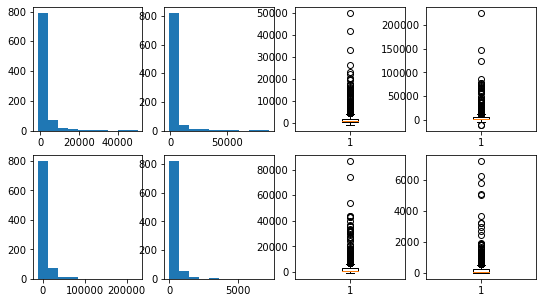

In [15]:
figure, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (9,5))

axes[0,0].hist(df[column_list[0]])
axes[0,1].hist(df[column_list[1]])
axes[1,0].hist(df[column_list[2]])
axes[1,1].hist(df[column_list[3]])

axes[0,2].boxplot(df[column_list[0]])
axes[1,2].boxplot(df[column_list[1]])
axes[0,3].boxplot(df[column_list[2]])
axes[1,3].boxplot(df[column_list[3]])

In [16]:
skewness = df.iloc[:, 0:28].skew(axis=0)
print(skewness)


Assets - Total                                9.905986
Cash                                         15.730523
Debt in Current Liabilities - Total          12.730282
Long-Term Debt - Total                        7.909051
Earnings Before Interest                      5.828360
Gross Profit (Loss)                           5.690840
Liabilities - Total                          10.085898
Retained Earnings                             6.126972
Total debt/total asset                        2.078632
total asset/total libiilities                10.175610
EBTI/total asset                              1.192855
gross profit/rev                             -6.159588
EBTI/REV                                     -8.901781
Dividends per Share - Pay Date - Calendar    14.247047
Sales/Turnover (Net)                          5.056396
Stockholders Equity - Total                   7.276060
Interest and Related Expense - Total          6.659460
Market Value - Total - Fiscal                 4.600331
Book Value

### As we can see that each of the column is skewed, we will have to go into deeper investigation of outliers. 
### The code will return the porpotion of outliers in each column.
### The definition of outlier will be from the boxplot - above or below 1.5 x IQR

In [17]:
for c in df.columns[0:28]:
    
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q3 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)
    lower_out = len(df.loc[(df[c] < fence_low), c])
    upper_out = len(df.loc[(df[c] > fence_high), c])
    outlier_count = upper_out + lower_out
    prop_out = outlier_count/len(df)
    print(c, ": "+" {:.2%}".format(prop_out))

Assets - Total :  11.50%
Cash :  13.06%
Debt in Current Liabilities - Total :  13.84%
Long-Term Debt - Total :  11.38%
Earnings Before Interest :  11.61%
Gross Profit (Loss) :  10.71%
Liabilities - Total :  12.50%
Retained Earnings :  20.42%
Total debt/total asset :  10.38%
total asset/total libiilities :  11.16%
EBTI/total asset :  15.40%
gross profit/rev :  4.80%
EBTI/REV :  6.70%
Dividends per Share - Pay Date - Calendar :  2.90%
Sales/Turnover (Net) :  10.16%
Stockholders Equity - Total :  12.28%
Interest and Related Expense - Total :  11.83%
Market Value - Total - Fiscal :  10.94%
Book Value Per Share :  7.81%
Common Equity - Liquidation Value :  12.61%
Comprehensive Income - Parent :  20.65%
Employees :  10.04%
Inventories - Total :  11.38%
Earnings Per Share from Operations :  13.50%
Revenue - Total :  10.16%
Operating Activities - Net Cash Flow :  11.38%
Financing Activities - Net Cash Flow :  30.69%
Net Cash Flow :  15.96%


# 
___________________________________________________________________________________________________________________
Most of the columns have outliers however it is not clear if there are few rows that are outliers or each row may be contributing individually with some outliers. 

We will have to check by row the distribution of the outliers. A new dataframe df_outlier will be used with this purpose. 

In this dataframe every cell will 1 one if the curresponding cell is an outlier if df_raint and 0 if it is not. 

In [18]:
df_outlier = df.copy()

for c in df_outlier.columns[0:28]:
    
    q1 = df_outlier[c].quantile(0.25)
    q3 = df_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interqaurtile range 
    fence_low = q1 - (1.5 * iqr)
    fence_high = q1 + (1.5 * iqr)
    
    for i in range(len(df_outlier)):
        
        if df.loc[i, c] < fence_low or df.loc[i, c] > fence_high:
            df_outlier.loc[i, c] = 1
            
        else: 
            df_outlier.loc[i, c] = 0
            
    
        
    

In [19]:
df_outlier.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating,Sector
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,Medium High Risk,Consumer Durables
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low Risk,Consumer Durables
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,Low Risk,Consumer Durables
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium High Risk,Consumer Durables
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,Low Risk,Consumer Durables


# 
___________________________________________________________________________________________________________________
Now counting how many outliers each row has and plot it

In [20]:
df_outlier.reset_index(drop=True, inplace=True)  # Reset index

In [21]:
print(df_outlier.dtypes)  # Print data types of columns

Assets - Total                               float64
Cash                                         float64
Debt in Current Liabilities - Total          float64
Long-Term Debt - Total                       float64
Earnings Before Interest                     float64
Gross Profit (Loss)                          float64
Liabilities - Total                          float64
Retained Earnings                            float64
Total debt/total asset                       float64
total asset/total libiilities                float64
EBTI/total asset                             float64
gross profit/rev                             float64
EBTI/REV                                     float64
Dividends per Share - Pay Date - Calendar    float64
Sales/Turnover (Net)                         float64
Stockholders Equity - Total                  float64
Interest and Related Expense - Total         float64
Market Value - Total - Fiscal                float64
Book Value Per Share                         f

In [22]:
df_outlier = df_outlier.drop(df_outlier.columns[[28, 29]], axis=1)  # Replace 0 and 1 with the column positions

In [23]:
df_outlier.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Book Value Per Share,Common Equity - Liquidation Value,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

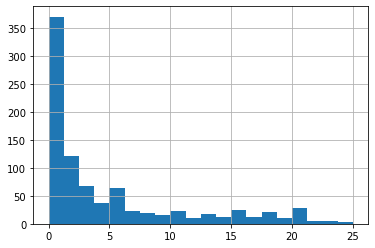

In [24]:
df_outlier["total"] = df_outlier.sum(axis=1)
df_outlier.total.hist(bins = 20)

# 

From the plot we can observe around 350 rows don't have any outliers. 
Other rows also have outliers so we will perform transformation on data to reduce negative impact. 



# 
### Data Reshaping 

1. Normalize the data between 0 and 1 (And Multiply by 1000)
2. Apply log on base 10 on each variables 

In [25]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()

for c in df.columns[0:28]:
    scaled_data = min_max_scaler.fit_transform(df[[c]].to_numpy()) * 1000
    df[c] = np.log10(scaled_data + 0.01)


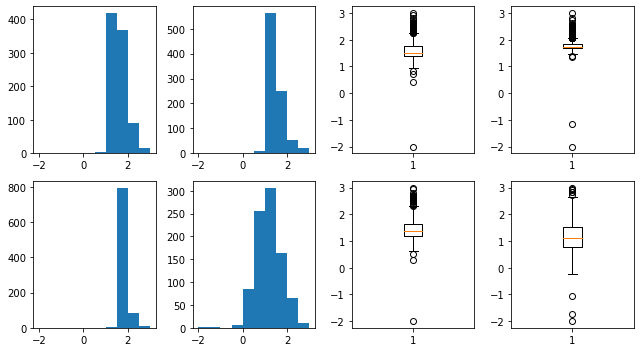

In [26]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df[column_list[0]])
axes[0, 1].hist(df[column_list[1]])
axes[1, 0].hist(df[column_list[2]])
axes[1, 1].hist(df[column_list[3]])

axes[0, 2].boxplot(df[column_list[0]])
axes[1, 2].boxplot(df[column_list[1]])
axes[0, 3].boxplot(df[column_list[2]])
axes[1, 3].boxplot(df[column_list[3]])

figure.tight_layout()

# 
There are issues related to visualisation of the data. The impact of outliers is huge, hence we cannot onbserve the patterns in the data. 
To enhance the visualization we will ignore outliers and replace with values with lower imopact such as lower hinge. 
To preserve the dataset we will use df_no_out

In [27]:
df_no_out = df.copy()

for c in df_no_out.columns[0:28]:
    
    q05 = df_no_out[c].quantile(0.10)
    q95 = df_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile Range 
    fence_low = q05 - (1.5 * iqr)
    fence_high = q95 + (1.5 * iqr)
    df_no_out.loc[df_no_out[c] > fence_high,c] = df_no_out[c].quantile(0.25)
    df_no_out.loc[df_no_out[c] < fence_low, c] = df_no_out[c].quantile(0.75) 

##
Now that we have this dataframe, we can use it to observe the data from a different angle. We will be able to observe data from different angle.

    1. Plotting all columns (boxplot) by each label: High Risk, Low Risk, Medium Risk, Highest Risk 

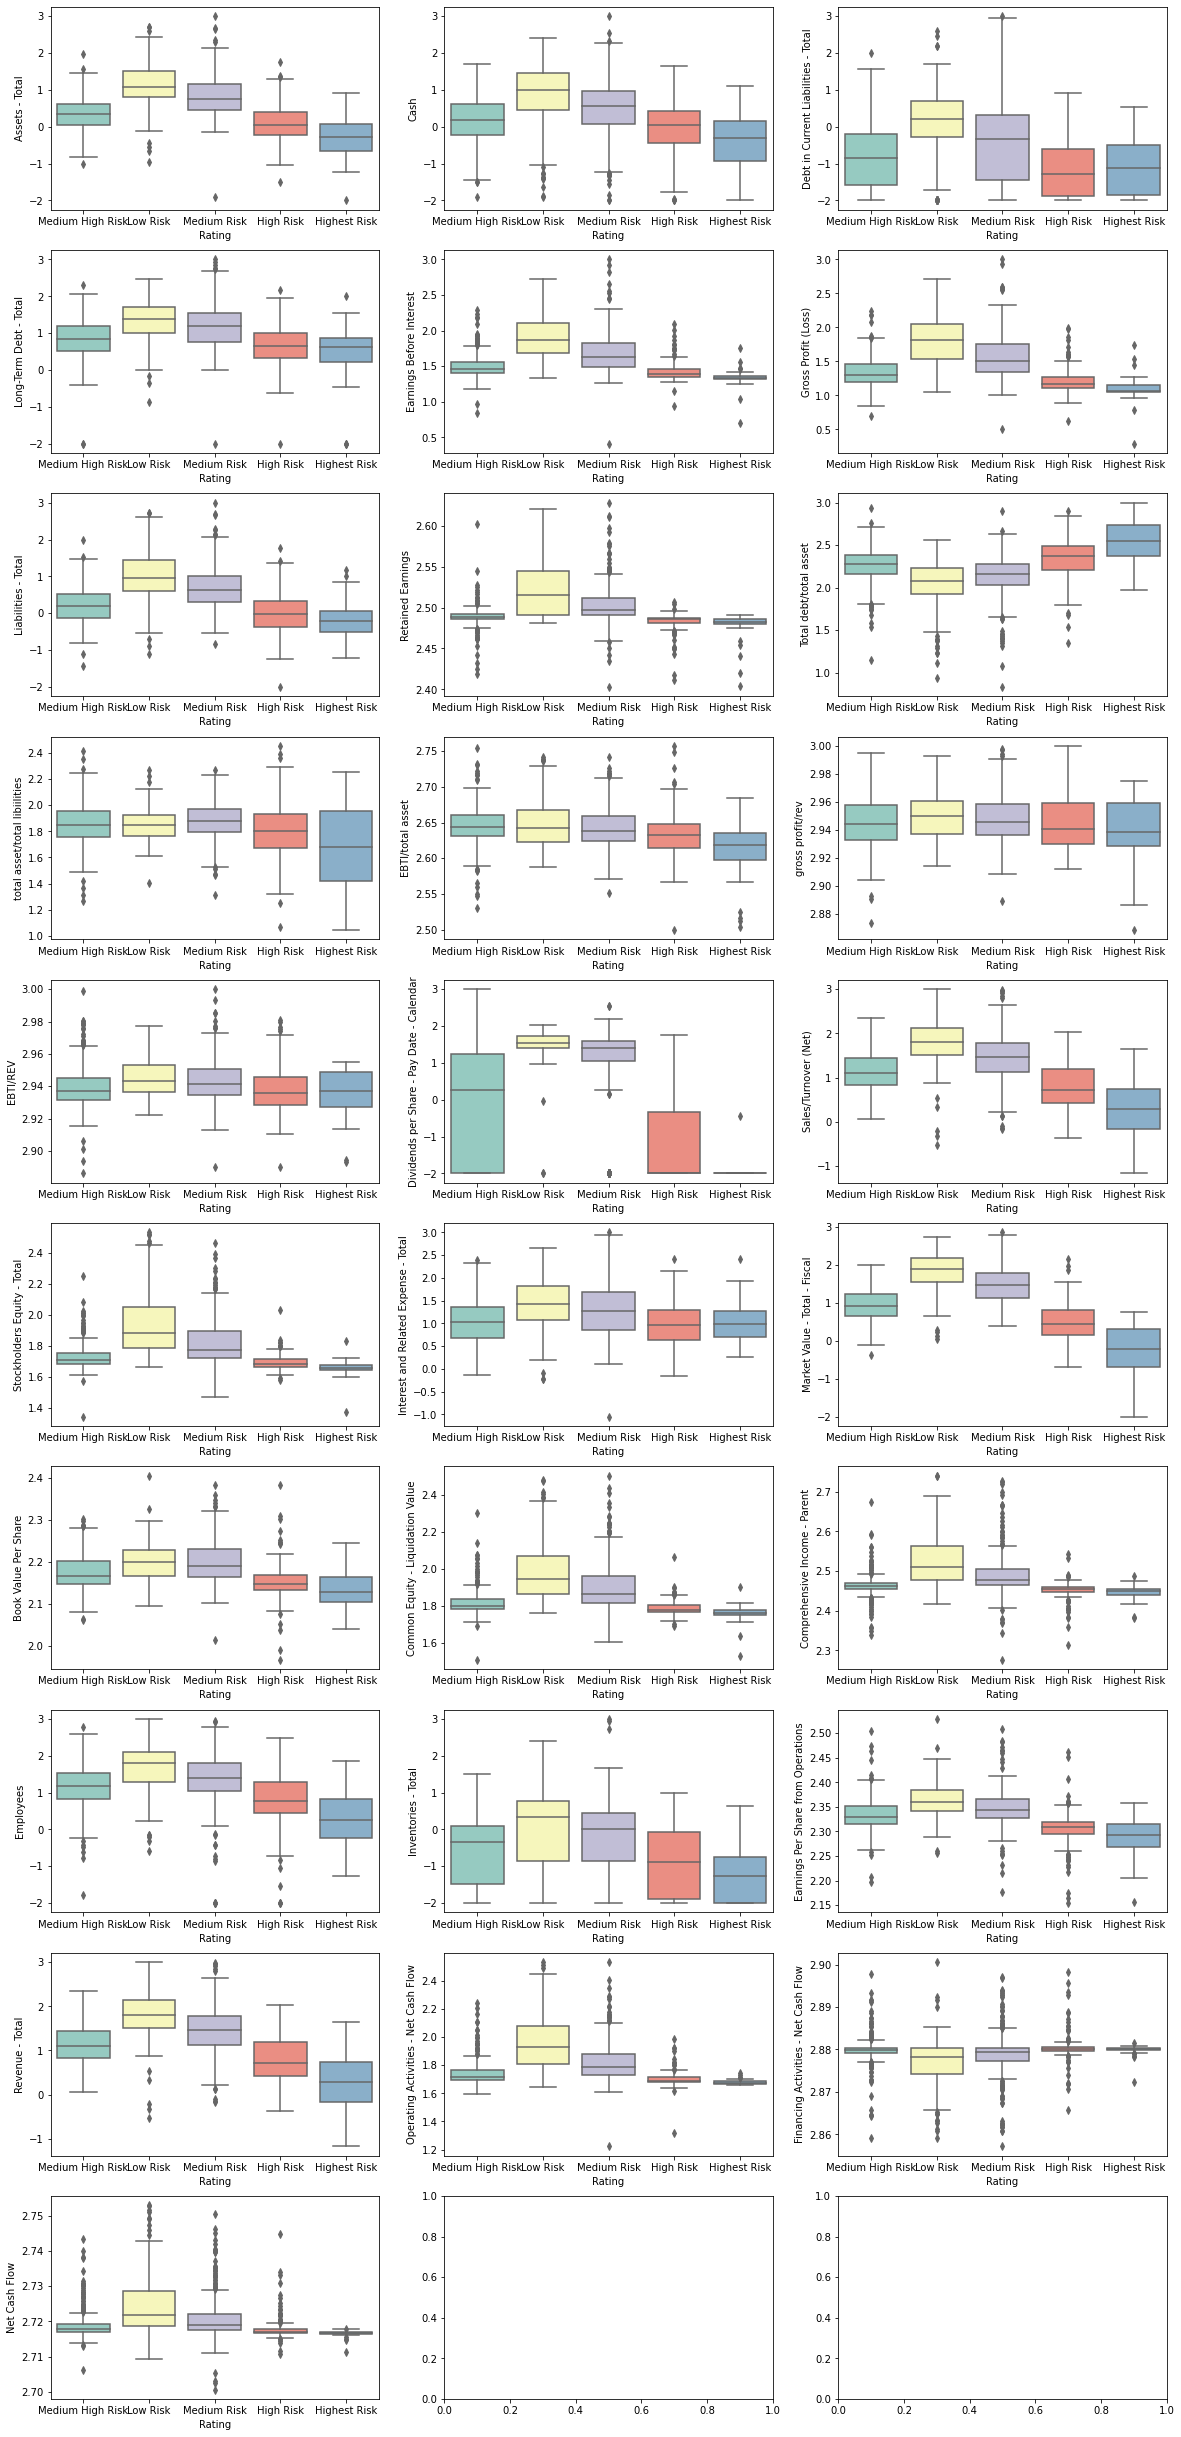

In [28]:
figure, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,44))

i = 0
j = 0

for c in df_no_out.columns[0:28]:
    
    sns.boxplot(x = df_no_out.Rating, y = df_no_out[c], palette = "Set3", ax = axes [i, j])
    
    if j ==2:
        j = 0
        i += 1
    else:
        j+=1

In [29]:
df.colors = 'a'
df_no_out.loc[df_no_out['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_no_out.loc[df_no_out['Rating'] == 'Low Risk', 'color'] = 'g'
df_no_out.loc[df_no_out['Rating'] == 'Medium Risk', 'color'] = 'b'
df_no_out.loc[df_no_out['Rating'] == 'High Risk','color'] = 'y'
df_no_out.loc[df_no_out['Rating'] == 'Highest Risk', 'color'] = 'm'

In [30]:
column_list = list(df.columns[0:28])
column_list = sample(column_list,12)

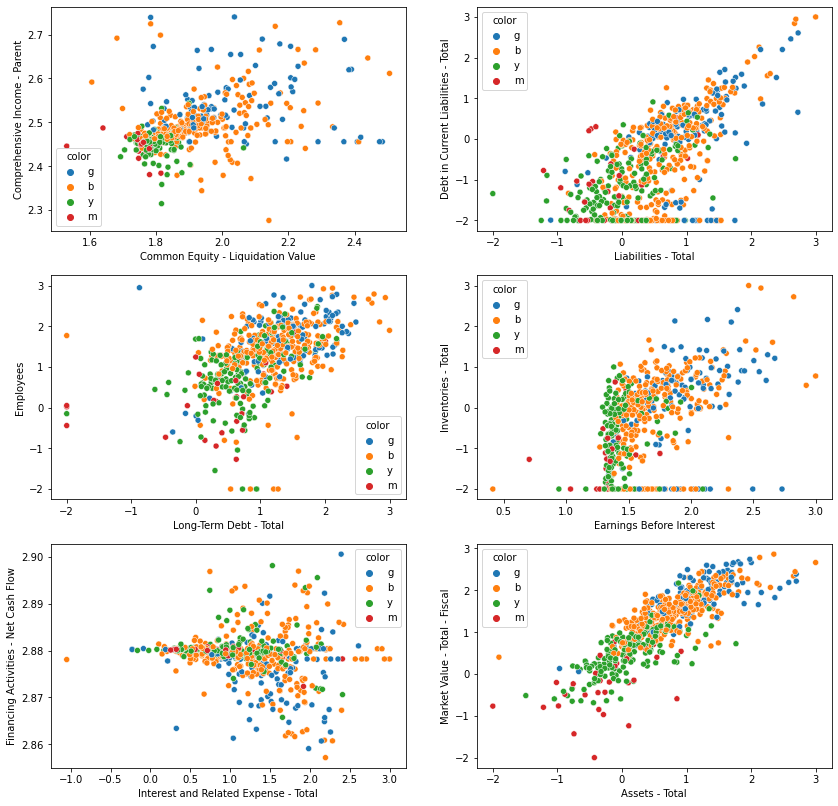

In [31]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0 
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = column_list[c], y=column_list[c+1], hue="color", data=df_no_out, ax=axes[j,i])
    
    if i == 1:
        i = 0
        j +=1
    
    else:
        i+=1

### Feature Selection

In [32]:
# Create a DataFrame from the data
df_frame = pd.DataFrame(df)

# Drop the "Rating" and "Sector" columns
df_frame = df.drop(columns=["Rating", "Sector"])

df_frame.head()


,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Book Value Per Share,Common Equity - Liquidation Value,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow
0,1.455499,0.424165,0.832060,2.056461,2.239975,2.244751,1.481086,2.466766,2.356657,1.653434,...,2.151233,1.877270,2.594102,2.449952,0.507547,2.386358,2.336831,2.209828,2.875903,2.743240
1,0.947455,-1.081090,0.047283,1.309085,1.672702,1.415570,0.846061,2.499811,2.114781,1.833256,...,2.257249,1.903324,2.485395,1.164828,-0.076460,2.362799,1.271506,1.812235,2.881245,2.722605
2,1.467161,2.184678,0.686187,2.020066,2.071821,2.192724,1.308579,2.582051,2.308627,1.907870,...,2.172518,2.181946,2.506659,2.237597,0.854107,2.332381,2.051531,2.014609,2.931458,2.781376
3,0.077073,0.516999,-2.000000,-2.000000,1.372673,1.161128,-1.442380,2.498878,-2.000000,3.000004,...,2.236782,1.831209,2.468093,0.586354,-0.446635,2.340903,0.500620,1.685883,2.879634,2.716533
4,1.585647,2.169876,0.777054,1.983868,2.114620,2.305437,1.513843,2.557447,2.154198,1.793049,...,2.277079,2.145752,2.579764,2.057154,-2.000000,2.416466,2.533409,2.051310,2.935711,2.787624


In [33]:
# Calculate the correlation matrix
correlation_matrix = df_frame.corr()

# Rank features by correlation in descending order
ranked_features = correlation_matrix.abs().sum().sort_values(ascending=False)

# Create a new DataFrame with columns ordered by rank
selected_data_ranked = df_frame[ranked_features.index]

In [34]:
# Create a PrettyTable for displaying features and scores
table = PrettyTable()
table.field_names = ['Feature', 'Score']

# Add rows to the table
for feature, score in ranked_features.items():  # Using items() instead of iteritems()
    table.add_row([feature, score])

# Print the table
print(table)

+-------------------------------------------+--------------------+
|                  Feature                  |       Score        |
+-------------------------------------------+--------------------+
|            Gross Profit (Loss)            | 13.214182599858136 |
|               Assets - Total              | 13.080989812393616 |
|          Earnings Before Interest         | 13.05245599148844  |
|              Revenue - Total              | 12.885982717811492 |
|            Sales/Turnover (Net)           | 12.885982717811492 |
|            Liabilities - Total            | 12.856168553049768 |
|       Market Value - Total - Fiscal       | 12.625024959807387 |
|           Long-Term Debt - Total          | 12.141611685687232 |
|    Interest and Related Expense - Total   | 11.202265667522482 |
|                    Cash                   | 10.322987777997191 |
|                 Employees                 | 10.24539480122374  |
|    Debt in Current Liabilities - Total    | 9.92578554015381

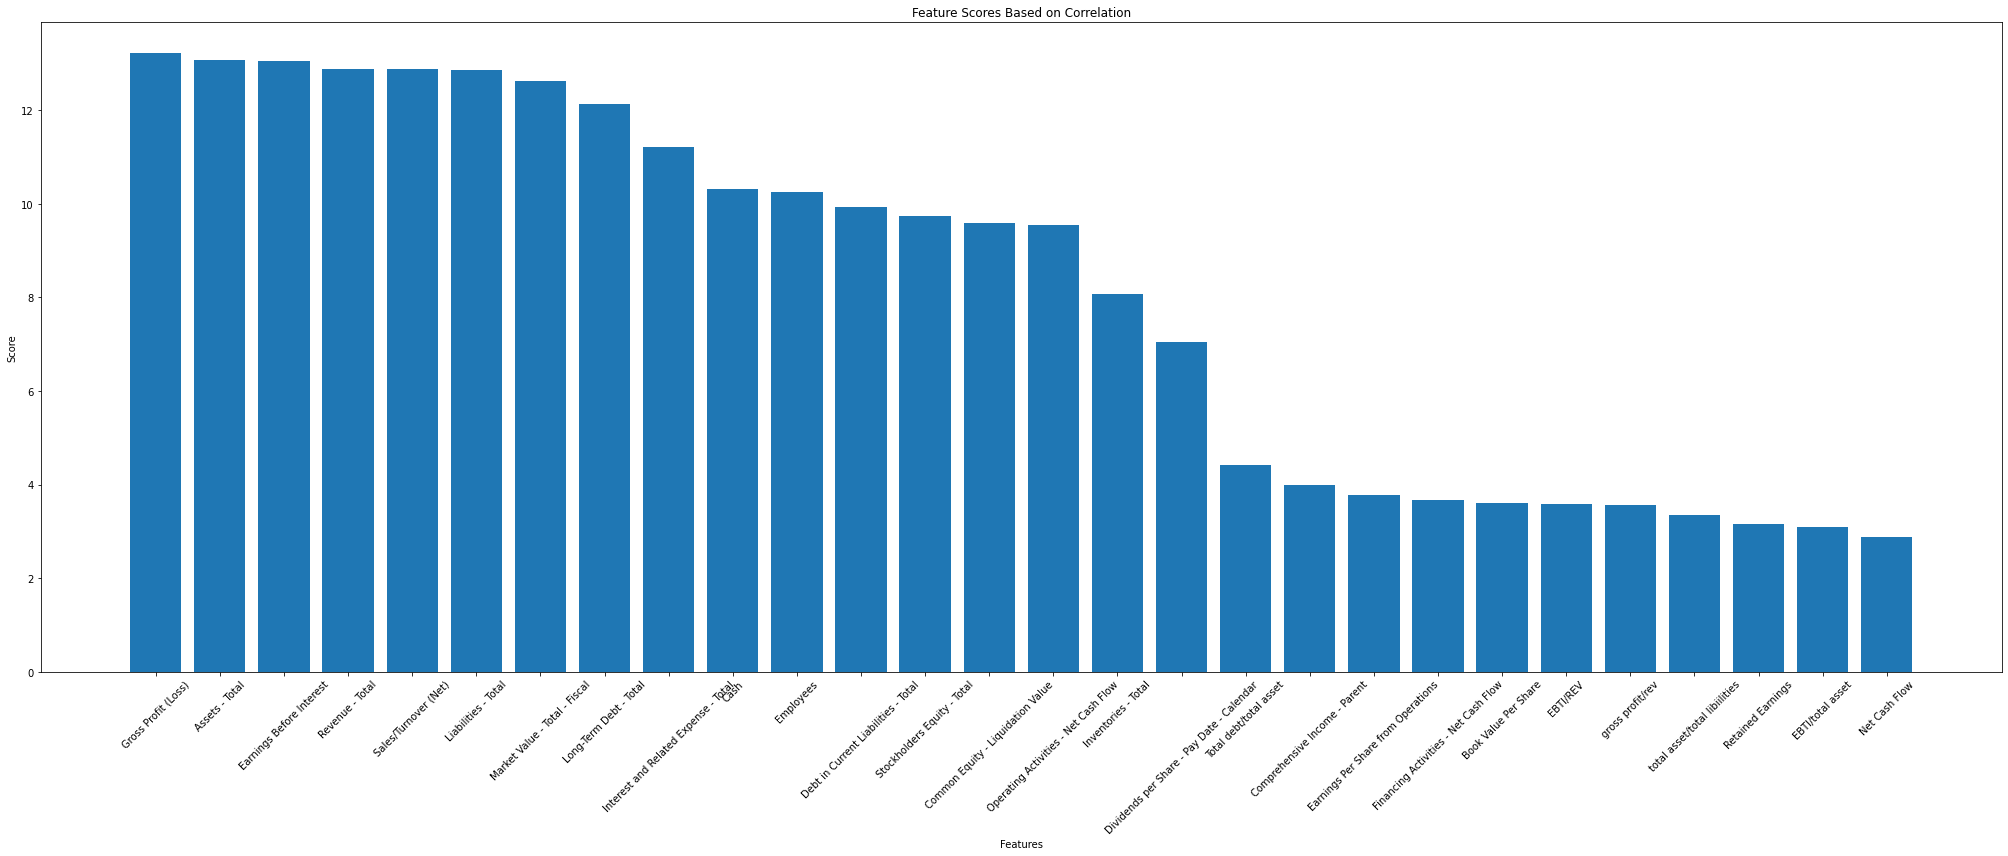

In [35]:
plt.figure(figsize=(28, 12))
plt.bar(selected_data_ranked.columns, ranked_features.values)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores Based on Correlation')
plt.tight_layout()
plt.show()

In [36]:
df= df.drop(columns=["Net Cash Flow", "EBTI/total asset", "Retained Earnings", "total asset/total libiilities", "gross profit/rev", "EBTI/REV", "Book Value Per Share", "Financing Activities - Net Cash Flow", "Comprehensive Income - Parent", "Total debt/total asset","Dividends per Share - Pay Date - Calendar"  ])

In [37]:
df.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Sales/Turnover (Net),Stockholders Equity - Total,Interest and Related Expense - Total,Market Value - Total - Fiscal,Common Equity - Liquidation Value,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Rating,Sector
0,1.455499,0.424165,0.832060,2.056461,2.239975,2.244751,1.481086,2.336831,1.792117,2.157000,1.820825,1.877270,2.449952,0.507547,2.386358,2.336831,2.209828,Medium High Risk,Consumer Durables
1,0.947455,-1.081090,0.047283,1.309085,1.672702,1.415570,0.846061,1.271506,1.824881,1.453178,1.384948,1.903324,1.164828,-0.076460,2.362799,1.271506,1.812235,Low Risk,Consumer Durables
2,1.467161,2.184678,0.686187,2.020066,2.071821,2.192724,1.308579,2.051531,2.125126,1.420767,2.199048,2.181946,2.237597,0.854107,2.332381,2.051531,2.014609,Low Risk,Consumer Durables
3,0.077073,0.516999,-2.000000,-2.000000,1.372673,1.161128,-1.442380,0.500620,1.740101,-1.740330,0.801335,1.831209,0.586354,-0.446635,2.340903,0.500620,1.685883,Medium High Risk,Consumer Durables
4,1.585647,2.169876,0.777054,1.983868,2.114620,2.305437,1.513843,2.533409,2.085249,1.641723,2.086048,2.145752,2.057154,-2.000000,2.416466,2.533409,2.051310,Low Risk,Consumer Durables


### Machine Learning 


Preparing the Dataset


In [38]:
le = preprocessing.LabelEncoder()

# Encode 'Sector' column (strip whitespace before accessing)
le.fit(df['Sector'].str.strip())
df['Sector'] = le.transform(df['Sector'].str.strip())

# Encode 'Rating' column (strip whitespace before accessing)
le.fit(df['Rating'].str.strip())
df['Rating'] = le.transform(df['Rating'].str.strip())


In [39]:
num_columns = df.shape[0]
print("Number of columns:", num_columns)

Number of columns: 896


### Naive Bayes

Gaussian Naive Bayes Test Accuracy: 0.3888888888888889
Gaussian Naive Bayes Test F1 Score: 0.38757153491265456
Gaussian Naive Bayes Training Accuracy: 0.4553072625698324
Gaussian Naive Bayes Training F1 Score: 0.44850558336846835


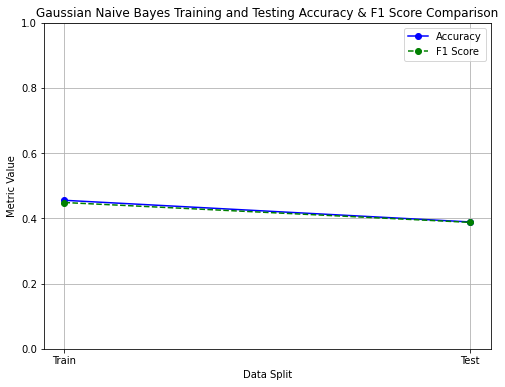

In [40]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)
X_train, y_train = df_train.iloc[:, 0:17], df_train.iloc[:, 17]
X_test, y_test = df_test.iloc[:, 0:17], df_test.iloc[:, 17]
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# Predictions on test data
y_pred_GNB = GNB_model.predict(X_test)

# Calculate accuracy on test data
Accuracy_GNB_test = metrics.accuracy_score(y_test, y_pred_GNB)
print("Gaussian Naive Bayes Test Accuracy:", Accuracy_GNB_test)

# Calculate F1 score on test data
F1_score_GNB_test = metrics.f1_score(y_test, y_pred_GNB, average='weighted')
print("Gaussian Naive Bayes Test F1 Score:", F1_score_GNB_test)

# Predictions on training data
y_train_pred_GNB = GNB_model.predict(X_train)

# Calculate accuracy on training data
Accuracy_GNB_train = metrics.accuracy_score(y_train, y_train_pred_GNB)
print("Gaussian Naive Bayes Training Accuracy:", Accuracy_GNB_train)

# Calculate F1 score on training data
F1_score_GNB_train = metrics.f1_score(y_train, y_train_pred_GNB, average='weighted')
print("Gaussian Naive Bayes Training F1 Score:", F1_score_GNB_train)

# Create a line graph to compare training and testing accuracy for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(['Train', 'Test'], [Accuracy_GNB_train, Accuracy_GNB_test], color='blue', marker='o', label='Accuracy')
plt.plot(['Train', 'Test'], [F1_score_GNB_train, F1_score_GNB_test], color='green', marker='o', linestyle='dashed', label='F1 Score')
plt.xlabel('Data Split')
plt.ylabel('Metric Value')
plt.title('Gaussian Naive Bayes Training and Testing Accuracy & F1 Score Comparison')
plt.ylim(0, 1)  # Set y-axis limit to match accuracy range
plt.legend()
plt.grid(True)
plt.show()


#### Confusion Matrix for Naive Bayes

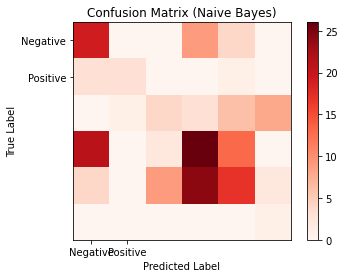

Confusion Matrix (Naive Bayes):
[[19  0  0  9  4  0]
 [ 3  3  0  0  1  0]
 [ 0  1  4  3  6  8]
 [21  0  2 26 13  0]
 [ 4  0  9 24 17  2]
 [ 0  0  0  0  0  1]]


In [41]:
cm = confusion_matrix(y_test, y_pred_GNB)

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Reds)
    plt.title("Confusion Matrix (Naive Bayes)")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

class_names = ["Negative", "Positive"]
plot_confusion_matrix(cm, class_names)

print("Confusion Matrix (Naive Bayes):")
print(cm)

### Random Forest 

Random Forest Test Accuracy: 0.6
Random Forest Test F1 Score: 0.5902408209074874
Random Forest Training Accuracy: 0.7667597765363129
Random Forest Training F1 Score: 0.7600554065219809


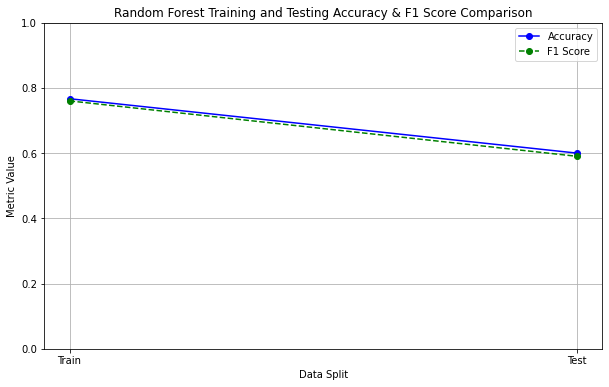

In [42]:
RF_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=5,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples required to split an internal node
    min_samples_leaf=2,    # Minimum samples required at a leaf node
    max_features='sqrt',   # Number of features to consider at each split
    bootstrap=True,        # Whether to use bootstrapping
    random_state=1234
)

# Fit the model to your training data
RF_model.fit(X_train, y_train)

# Evaluate the model's performance on test data
y_pred_RF_test = RF_model.predict(X_test)
Accuracy_RF_test = metrics.accuracy_score(y_test, y_pred_RF_test)
F1_score_RF_test = metrics.f1_score(y_test, y_pred_RF_test, average='weighted')
print("Random Forest Test Accuracy:", Accuracy_RF_test)
print("Random Forest Test F1 Score:", F1_score_RF_test)

# Predictions on training data
y_pred_RF_train = RF_model.predict(X_train)

# Calculate accuracy on training data
Accuracy_RF_train = metrics.accuracy_score(y_train, y_pred_RF_train)
F1_score_RF_train = metrics.f1_score(y_train, y_pred_RF_train, average='weighted')
print("Random Forest Training Accuracy:", Accuracy_RF_train)
print("Random Forest Training F1 Score:", F1_score_RF_train)

# Create a line graph to compare training and testing accuracy for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(['Train', 'Test'], [Accuracy_RF_train, Accuracy_RF_test], color='blue', marker='o', label='Accuracy')
plt.plot(['Train', 'Test'], [F1_score_RF_train, F1_score_RF_test], color='green', marker='o', linestyle='dashed', label='F1 Score')
plt.xlabel('Data Split')
plt.ylabel('Metric Value')
plt.title('Random Forest Training and Testing Accuracy & F1 Score Comparison')
plt.ylim(0, 1)  # Set y-axis limit to match accuracy range
plt.legend()
plt.grid(True)
plt.show()

#### Confusion Matrix for Random Forest

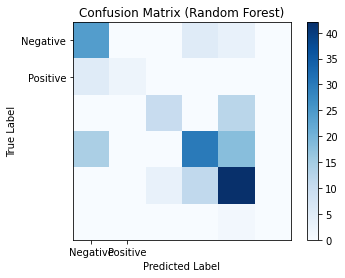

Confusion Matrix:
[[24  0  0  5  3  0]
 [ 5  2  0  0  0  0]
 [ 0  0 10  0 12  0]
 [14  0  0 30 18  0]
 [ 0  0  3 11 42  0]
 [ 0  0  0  0  1  0]]


In [43]:
cm = confusion_matrix(y_test, y_pred_RF_test)

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Random Forest)")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

class_names = ["Negative", "Positive"]
plot_confusion_matrix(cm, class_names)

print("Confusion Matrix:")
print(cm)


### Support Vector Machine

SVM Test Accuracy: 0.5444444444444444
SVM Test F1 Score: 0.5183287582283278
SVM Training Accuracy: 0.6033519553072626
SVM Training F1 Score: 0.5700767246624752


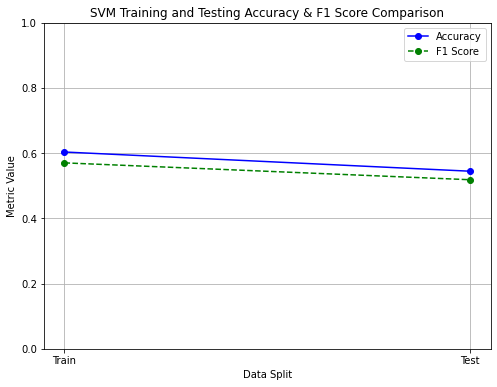

In [44]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)
X_train, y_train = df_train.iloc[:, 0:17], df_train.iloc[:, 17]
X_test, y_test = df_test.iloc[:, 0:17], df_test.iloc[:, 17]

# Specify SVM model parameters
C = 1.0  # Regularization parameter (can be adjusted)
kernel = 'rbf'  # Kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
gamma = 'scale'  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid' (can be adjusted)

# Creating and configuring the SVM model
SVC_model = svm.SVC(
    C=C,
    kernel=kernel,
    gamma=gamma,
    random_state=1234
)

# Fitting the SVM model to the training data
SVC_model.fit(X_train, y_train)

# Predictions on test data
y_pred_SVM = SVC_model.predict(X_test)

# Calculate accuracy on test data
Accuracy_SVM_test = metrics.accuracy_score(y_test, y_pred_SVM)
print("SVM Test Accuracy:", Accuracy_SVM_test)

# Calculate F1 score on test data
F1_score_SVM_test = metrics.f1_score(y_test, y_pred_SVM, average='weighted')
print("SVM Test F1 Score:", F1_score_SVM_test)

# Predictions on training data
y_train_pred_SVM = SVC_model.predict(X_train)

# Calculate accuracy on training data
Accuracy_SVM_train = metrics.accuracy_score(y_train, y_train_pred_SVM)
print("SVM Training Accuracy:", Accuracy_SVM_train)

# Calculate F1 score on training data
F1_score_SVM_train = metrics.f1_score(y_train, y_train_pred_SVM, average='weighted')
print("SVM Training F1 Score:", F1_score_SVM_train)

# Create a line graph to compare training and testing accuracy and F1 score for SVM
plt.figure(figsize=(8, 6))
plt.plot(['Train', 'Test'], [Accuracy_SVM_train, Accuracy_SVM_test], color='blue', marker='o', label='Accuracy')
plt.plot(['Train', 'Test'], [F1_score_SVM_train, F1_score_SVM_test], color='green', marker='o', linestyle='dashed', label='F1 Score')
plt.xlabel('Data Split')
plt.ylabel('Metric Value')
plt.title('SVM Training and Testing Accuracy & F1 Score Comparison')
plt.ylim(0, 1)  # Set y-axis limit to match accuracy range
plt.legend()
plt.grid(True)
plt.show()


#### Confusion Matrix for SVM

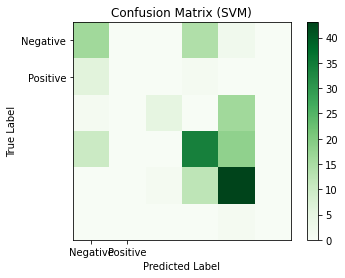

Confusion Matrix:
[[16  0  0 14  2  0]
 [ 6  0  0  1  0  0]
 [ 1  0  5  0 16  0]
 [10  0  0 34 18  0]
 [ 0  0  1 12 43  0]
 [ 0  0  0  0  1  0]]


In [45]:
cm = confusion_matrix(y_test, y_pred_SVM)

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Greens)
    plt.title("Confusion Matrix (SVM)")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

class_names = ["Negative", "Positive"]
plot_confusion_matrix(cm, class_names)

print("Confusion Matrix:")
print(cm)

### Comparing Results

In [46]:
accuracy_list = [Accuracy_RF_test, Accuracy_SVM_test, Accuracy_GNB_test]

model_list = ["Random Forest", "Support Vector Machine", "Naive Bayes"]

df_accuracy = pd.DataFrame({"Model": model_list, "Accuracy": accuracy_list})

/var/folders/jt/0gc77scs1dq06yh5mvn_qc680000gn/T/ipykernel_9289/1542958746.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


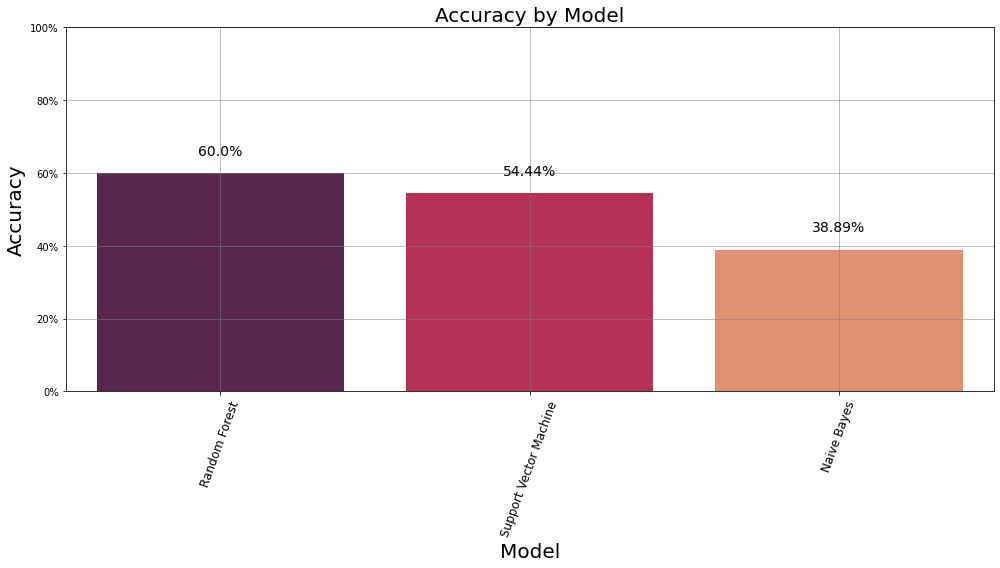

In [47]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(14,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()
plt.tight_layout()